<a href="https://colab.research.google.com/github/karthikcs/machine-learning-coe/blob/master/bike-share/bike_sharing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring bike-sharing Dataset

[github link](https://github.com/karthikcs/machine-learning-coe/tree/master/bike-share)



In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [ ]:
df = pd.read_csv('https://github.com/karthikcs/machine-learning-coe/raw/master/bike-share/bike-share.csv')
df[df['holiday'] == 1].head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
372,373,2011-01-17,1,0,1,0,1,1,0,2,0.20,0.1970,0.47,0.2239,1,16,17
373,374,2011-01-17,1,0,1,1,1,1,0,2,0.20,0.1970,0.44,0.1940,1,15,16
374,375,2011-01-17,1,0,1,2,1,1,0,2,0.18,0.1667,0.43,0.2537,0,8,8
375,376,2011-01-17,1,0,1,3,1,1,0,2,0.18,0.1818,0.43,0.1940,0,2,2
376,377,2011-01-17,1,0,1,4,1,1,0,2,0.18,0.1970,0.43,0.1343,1,2,3
377,378,2011-01-17,1,0,1,5,1,1,0,2,0.18,0.1970,0.43,0.1642,0,1,1
378,379,2011-01-17,1,0,1,6,1,1,0,2,0.18,0.1818,0.43,0.1940,0,5,5
379,380,2011-01-17,1,0,1,7,1,1,0,2,0.16,0.1818,0.50,0.1343,4,9,13
380,381,2011-01-17,1,0,1,8,1,1,0,2,0.16,0.1515,0.47,0.2239,3,30,33
381,382,2011-01-17,1,0,1,9,1,1,0,2,0.16,0.1515,0.47,0.2239,8,39,47


Let us check completeness of the data

In [ ]:
print('The shape of the dataframe is:',df.shape)
# print('The shape of the dataframe is: %s' %str((df.shape)))

df.count()

The shape of the dataframe is: (17379, 17)


instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

## Story point 1
We can see that all the columns have all the data. So there is nothing missing

---


## Story point 2
As per the columns description we understand following are categorial columns

- season
- yr
- mnth
- hr
- holiday
- weekday
- working day
- weathersit

Continous values
- temp
- atemp
- hum
- windspeed
- casual
- registered
- cnt
---


Now let us understand basic statistics of the Data for all the numerical columns


In [ ]:
continous_cols = ['temp', 'atemp', 'hum', 'windspeed','casual','registered', 'cnt']

Please note that, statistics of categorical columns does not make any sense. We need to focus on statistics of the continous values only. So, let us filter them out

In [ ]:
df_num = df.describe()[continous_cols]
df_num


,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Story point 4
We can see that first 4 columns are realted to weather and normalized. 

`Normalization` means - all the values to be re-scaled between 0 and 1. 0 will be minimum value and 1 represents the max value in the data. 

Last 3 colmns are counts (Rental counts). They are not normalized. They are the actual values. 

`cnt` = `casual` + `registered`

---

Let us see the histogram of data columns





Text(0.5, 0, 'casual')

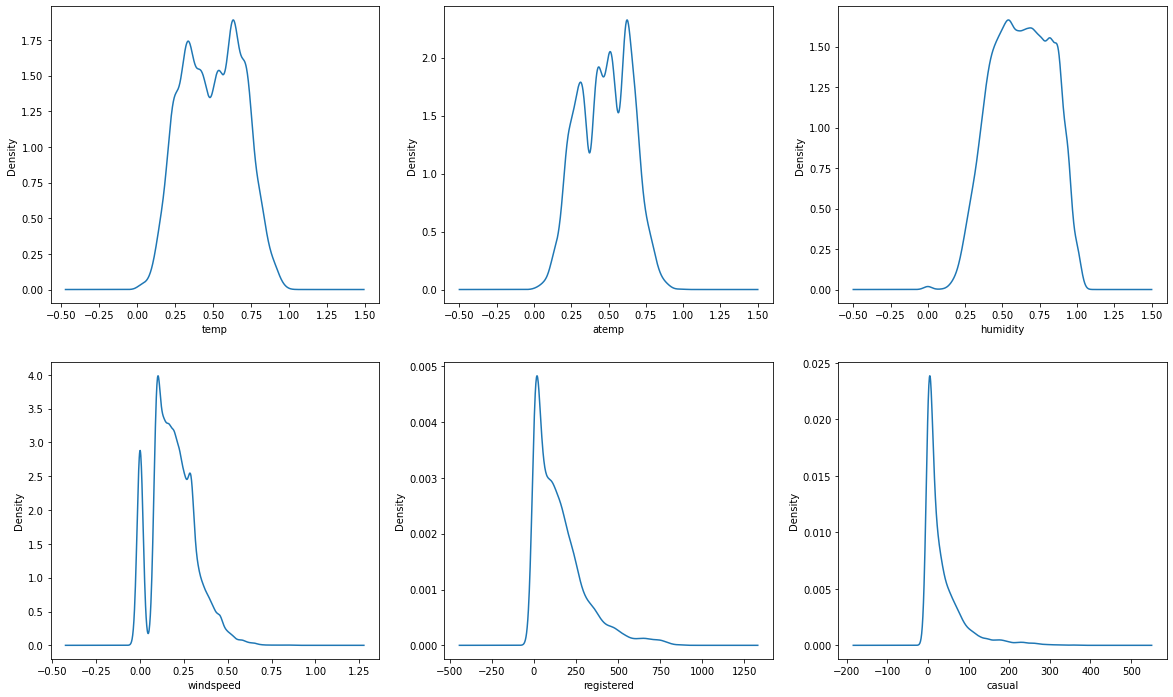

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,12))
a=fig.add_subplot(2, 3, 1)
ax = df.temp.plot.kde()
ax.set_xlabel('temp')

a=fig.add_subplot(2, 3, 2)
ax = df.atemp.plot.kde()
ax.set_xlabel('atemp')

a=fig.add_subplot(2, 3, 3)
ax = df.hum.plot.kde()
ax.set_xlabel('humidity')

a=fig.add_subplot(2, 3, 4)
ax = df.windspeed.plot.kde()
ax.set_xlabel('windspeed')

a=fig.add_subplot(2, 3, 5)
ax = df.registered.plot.kde()
ax.set_xlabel('registered')

a=fig.add_subplot(2, 3, 6)
ax = df.casual.plot.kde()
ax.set_xlabel('casual')


## Story Point 5
 - We can see the data temerature fields is almost **Normally distributed**. Not too much of variance. 
 - Windspeed has a long tail towards right. It is **Right Skewed** Data
 - Counts of bike rentals - Registered and Casual are heavilty **Right Skewed**. 
 



Let us try to confirm the same usign Box Plot

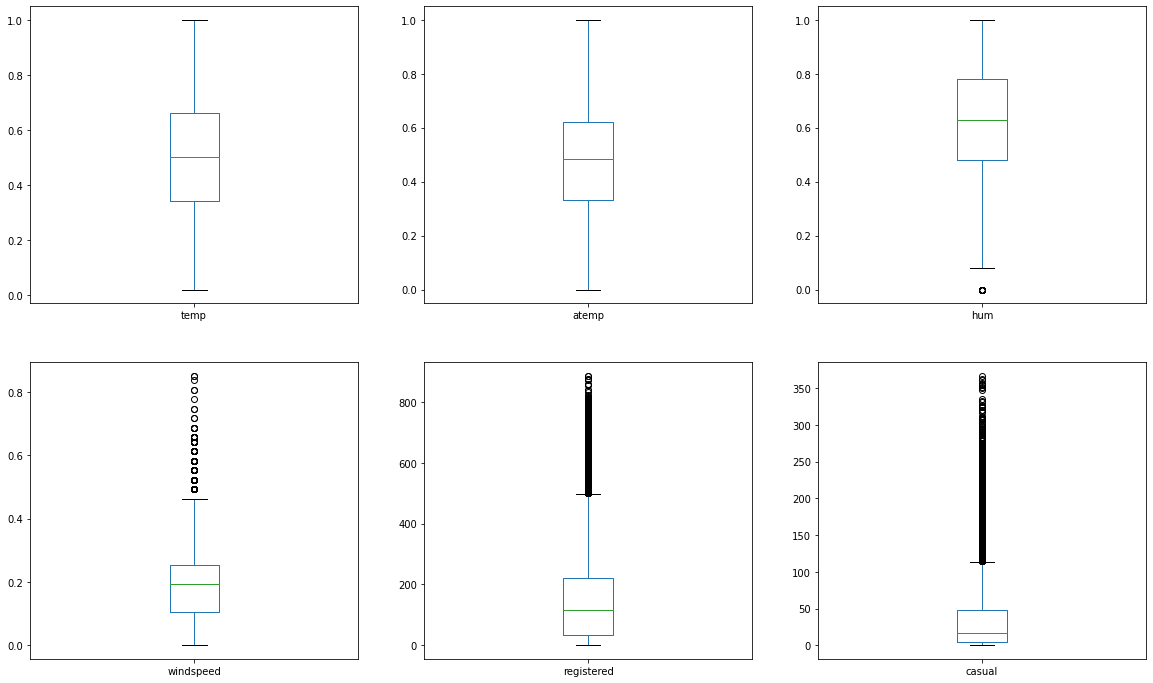

In [ ]:
fig = plt.figure(figsize=(20,12))
a=fig.add_subplot(2, 3, 1)
ax = df.temp.plot.box()


a=fig.add_subplot(2, 3, 2)
ax = df.atemp.plot.box()

a=fig.add_subplot(2, 3, 3)
ax = df.hum.plot.box()

a=fig.add_subplot(2, 3, 4)
ax = df.windspeed.plot.box()

a=fig.add_subplot(2, 3, 5)
ax = df.registered.plot.box()

a=fig.add_subplot(2, 3, 6)
ax = df.casual.plot.box()


## Story Point 6
 - No outliers in `temp`, `atemp` and only 1 outlier in `humidity` data
 - We can see there are quite a few outliers in `Windspeed` data
 - Huge number of outliers in `registered` and `casual` data

In [ ]:
print(df[['cnt','temp']].corr())

print(df[['cnt','atemp']].corr())

print(df[['cnt','hum']].corr())

print(df[['cnt','windspeed']].corr())

print(df[['cnt','season']].corr())

print(df[['cnt','holiday']].corr())


           cnt      temp
cnt   1.000000  0.404772
temp  0.404772  1.000000
            cnt     atemp
cnt    1.000000  0.400929
atemp  0.400929  1.000000
          cnt       hum
cnt  1.000000 -0.322911
hum -0.322911  1.000000
                cnt  windspeed
cnt        1.000000   0.093234
windspeed  0.093234   1.000000
             cnt    season
cnt     1.000000  0.178056
season  0.178056  1.000000
              cnt   holiday
cnt      1.000000 -0.030927
holiday -0.030927  1.000000


## Story Point 7
 - We can see that number of bike shares is **40%** correlated with temparature and **32%** with humidity
 - Other correlations are small 

In [ ]:
# df_pivot = df.pivot_table(values='cnt', columns='season', aggfunc='sum')
fig = plt.figure(figsize=(10,8))

df_season = df.groupby(by='season').agg('sum')[['cnt']].reset_index()
fig  = px.bar(df_season, x='season', y='cnt')
fig.update_layout(template='plotly_dark')
fig.show()

df_weathersit  = df.groupby(by='weathersit').agg('sum')[['cnt']].reset_index()
fig  = px.bar(df_weathersit, x='weathersit', y='cnt')
fig.update_layout(template='plotly_dark')
fig.show()

df_workingday   = df.groupby(by='workingday').agg('sum')[['cnt']].reset_index()
fig  = px.bar(df_workingday, x='workingday', y='cnt')
fig.update_layout(template='plotly_dark')
fig.show()

df_holiday  = df.groupby(by='holiday').agg('sum')[['cnt']].reset_index()
fig  = px.bar(df_holiday, x='holiday', y='cnt')
fig.update_layout(template='plotly_dark')
fig.show()

df_hr  = df.groupby(by='hr').agg('sum')[['cnt']].reset_index()
fig  = px.bar(df_hr, x='hr', y='cnt')
fig.update_layout(template='plotly_dark')
fig.show()

df_mnth  = df.groupby(by='mnth').agg('sum')[['cnt']].reset_index()
fig  = px.bar(df_mnth, x='mnth', y='cnt')
fig.update_layout(template='plotly_dark')
fig.show()

df_weekday = df.groupby(by='weekday').agg('sum')[['cnt']].reset_index()
fig  = px.bar(df_weekday, x='weekday', y='cnt')
fig.update_layout(template='plotly_dark')
fig.show()

<Figure size 720x576 with 0 Axes>

## Story Point 8
 - Spring and Summer season has more number of rentals, winter is least, as expected 
 - If it is clear sky, partly cloudy, it gets huge number of rentals, compared to mist. Snow and Rains cause almost zero bike-sharing
 - Working day makes to double the number of rentals
 - If it is holiday the number is negligible 
 - Bike rentals usually starts from 6 AM to 11 PM
 - Jan and Feb causes very few number
 - Weekday of week has no influence on number 
